In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import prep

In [2]:
df = prep.prep_asd_data()

In [3]:
df.head()

,case_no,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,age_mons,survey_score,ethnicity,whocompletedthetest,is_male,has_jaundice,has_fam_history,has_asd,is_white,is_hispanic,is_black,is_asian,is_middle_eastern,is_other
0,1,0,0,0,0,0,0,1,1,0,1,28,3,middle eastern,family member,0,1,0,0,0,0,0,0,1,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,White European,family member,1,1,0,1,1,0,0,0,0,0
2,3,1,0,0,0,0,0,1,1,0,1,36,4,middle eastern,family member,1,1,0,1,0,0,0,0,1,0
3,4,1,1,1,1,1,1,1,1,1,1,24,10,Hispanic,family member,1,0,0,1,0,1,0,0,0,0
4,5,1,1,0,1,1,1,1,1,1,1,20,9,White European,family member,0,0,1,1,1,0,0,0,0,0


In [4]:
df.isnull().sum()

case_no                0
a1                     0
a2                     0
a3                     0
a4                     0
a5                     0
a6                     0
a7                     0
a8                     0
a9                     0
a10                    0
age_mons               0
survey_score           0
ethnicity              0
whocompletedthetest    0
is_male                0
has_jaundice           0
has_fam_history        0
has_asd                0
is_white               0
is_hispanic            0
is_black               0
is_asian               0
is_middle_eastern      0
is_other               0
dtype: int64

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

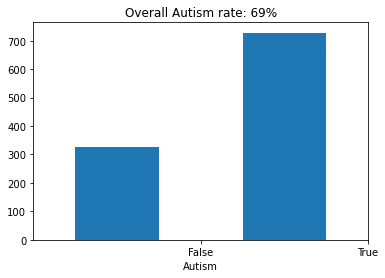

In [52]:
df.has_asd.value_counts().sort_index().plot.bar()
autism_rate = df.has_asd.mean()
plt.title(f"Overall Autism rate: {autism_rate:.0%}")
plt.xlabel('Autism')
plt.xticks(locs, ('False', 'True'))
plt.xticks(rotation = 0)

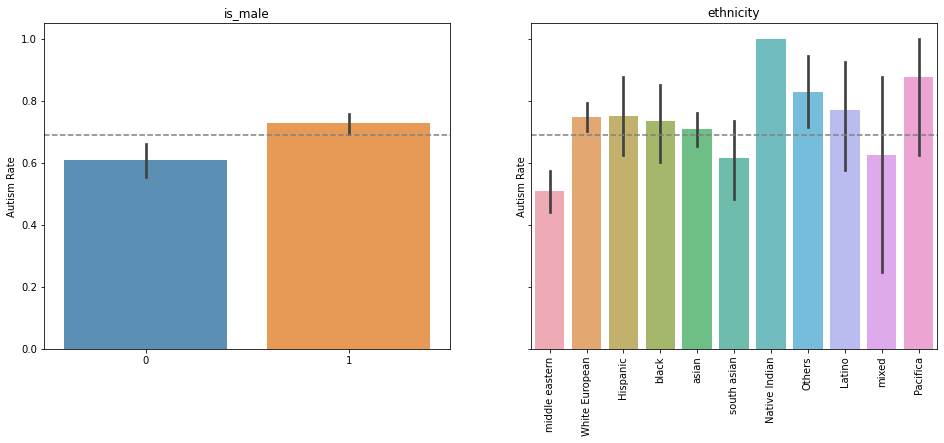

In [50]:
features = ['is_male', 'ethnicity']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'has_asd', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Autism Rate')
    ax[i].set_title(feature)
    ax[i].axhline(autism_rate, ls='--', color='grey')
    plt.xticks(rotation = 90)

Text(0.5, 15.0, '')

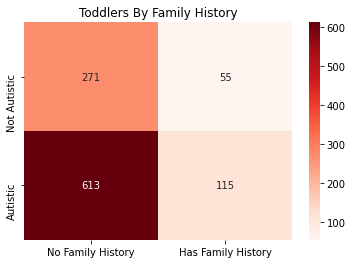

In [7]:
crosstab = pd.crosstab(df.has_asd, df.has_fam_history)
sns.heatmap(crosstab, annot= True, cmap= 'Reds', fmt= 'd')

plt.title('Toddlers By Family History')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Autistic', 'Autistic'))
plt.xticks(locs, ('No Family History', 'Has Family History'))
plt.ylabel('')
plt.xlabel('')

Text(33.0, 0.5, '')

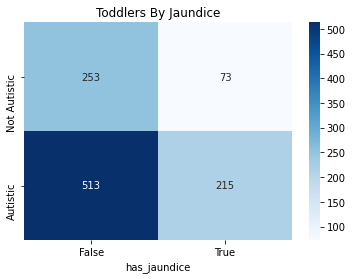

In [33]:
crosstab = pd.crosstab(df.has_asd, df.has_jaundice)
sns.heatmap(crosstab, annot= True, cmap= 'Blues', fmt= 'd')

plt.title('Toddlers By Jaundice')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Autistic', 'Autistic'))
plt.xticks(locs, ('False', 'True'))
plt.ylabel('')

Text(33.0, 0.5, '')

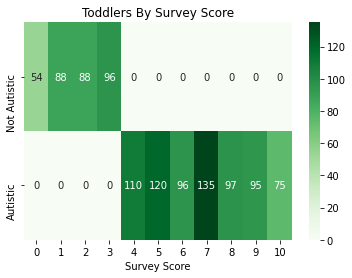

In [35]:
crosstab = pd.crosstab(df.has_asd, df.survey_score)
sns.heatmap(crosstab, annot= True, cmap= 'Greens', fmt= 'd')

plt.title('Toddlers By Survey Score')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Autistic', 'Autistic'))
plt.xlabel('Survey Score')
plt.ylabel('')

Comparing If Certain Questions Are More Correlated To Autism


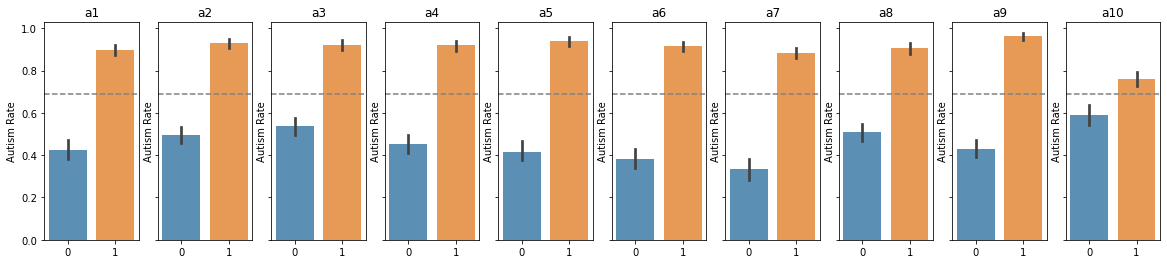

In [62]:
features = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10']

_, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'has_asd', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Autism Rate')
    ax[i].set_title(feature)
    ax[i].axhline(autism_rate, ls='--', color='grey')
print('Comparing If Certain Questions Are More Correlated To Autism')